Importing the necessary libraries

Data collection

In [87]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

import statsmodels.formula.api as smf 
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport, compare # lol they still using the old package using the former name

importing dataset

In [88]:
df = pd.read_csv("archive (11).zip")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


Data inspection

In [89]:
display(df.shape)
display(df.columns)

(10002, 14)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


Data Cleaning

In [91]:
#missing values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [92]:
#dropping missing values
threshold = len(df)*0.05
dropables = df.isna().sum()>=threshold
#print(dropables)
df.dropna(inplace=True)

In [93]:
#confirming chages 
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [94]:
#dropping irrelevant columns
df.drop('RowNumber',axis=1,inplace=True)

In [95]:
#Setting 'hascard', 'isactivemember', 'exited and gender to categorical datas 
df[['HasCrCard','IsActiveMember','Exited','Gender']] = df[['HasCrCard','IsActiveMember','Exited','Gender']].astype('category')
df['Age'] = df['Age'].astype('int')

In [96]:
#confirming changes
print(df.dtypes)

CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object


In [97]:
#Checking for duplicates 
df.duplicated()

0        False
1        False
2        False
3        False
5        False
         ...  
9997     False
9998     False
9999      True
10000    False
10001     True
Length: 9998, dtype: bool

In [98]:
#dropping dup
df.drop_duplicates().head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0.0,0.0,93826.63,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1.0,0.0,149756.71,1


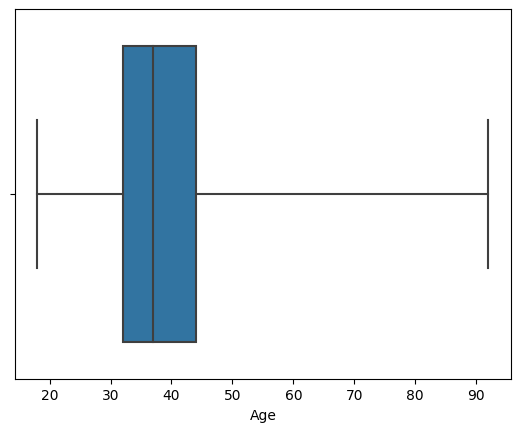

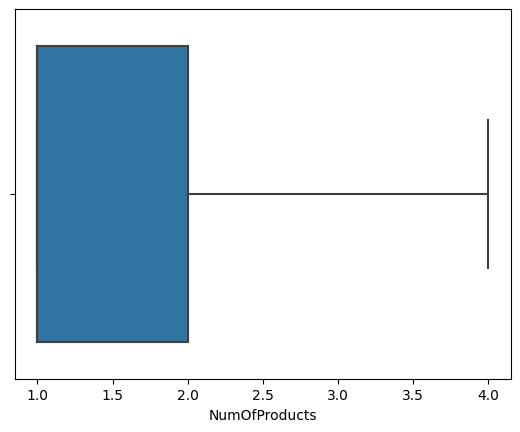

In [99]:
#Checking for outliers
sns.boxplot(x='Age',data=df,whis=10)
plt.show()
plt.clf()
sns.boxplot(x='NumOfProducts',data=df,whis=10)
plt.show()
#Setting whis to 10 so as incase of small data unnecessary outliers are not brought up but if it were a big data outliers will be detected

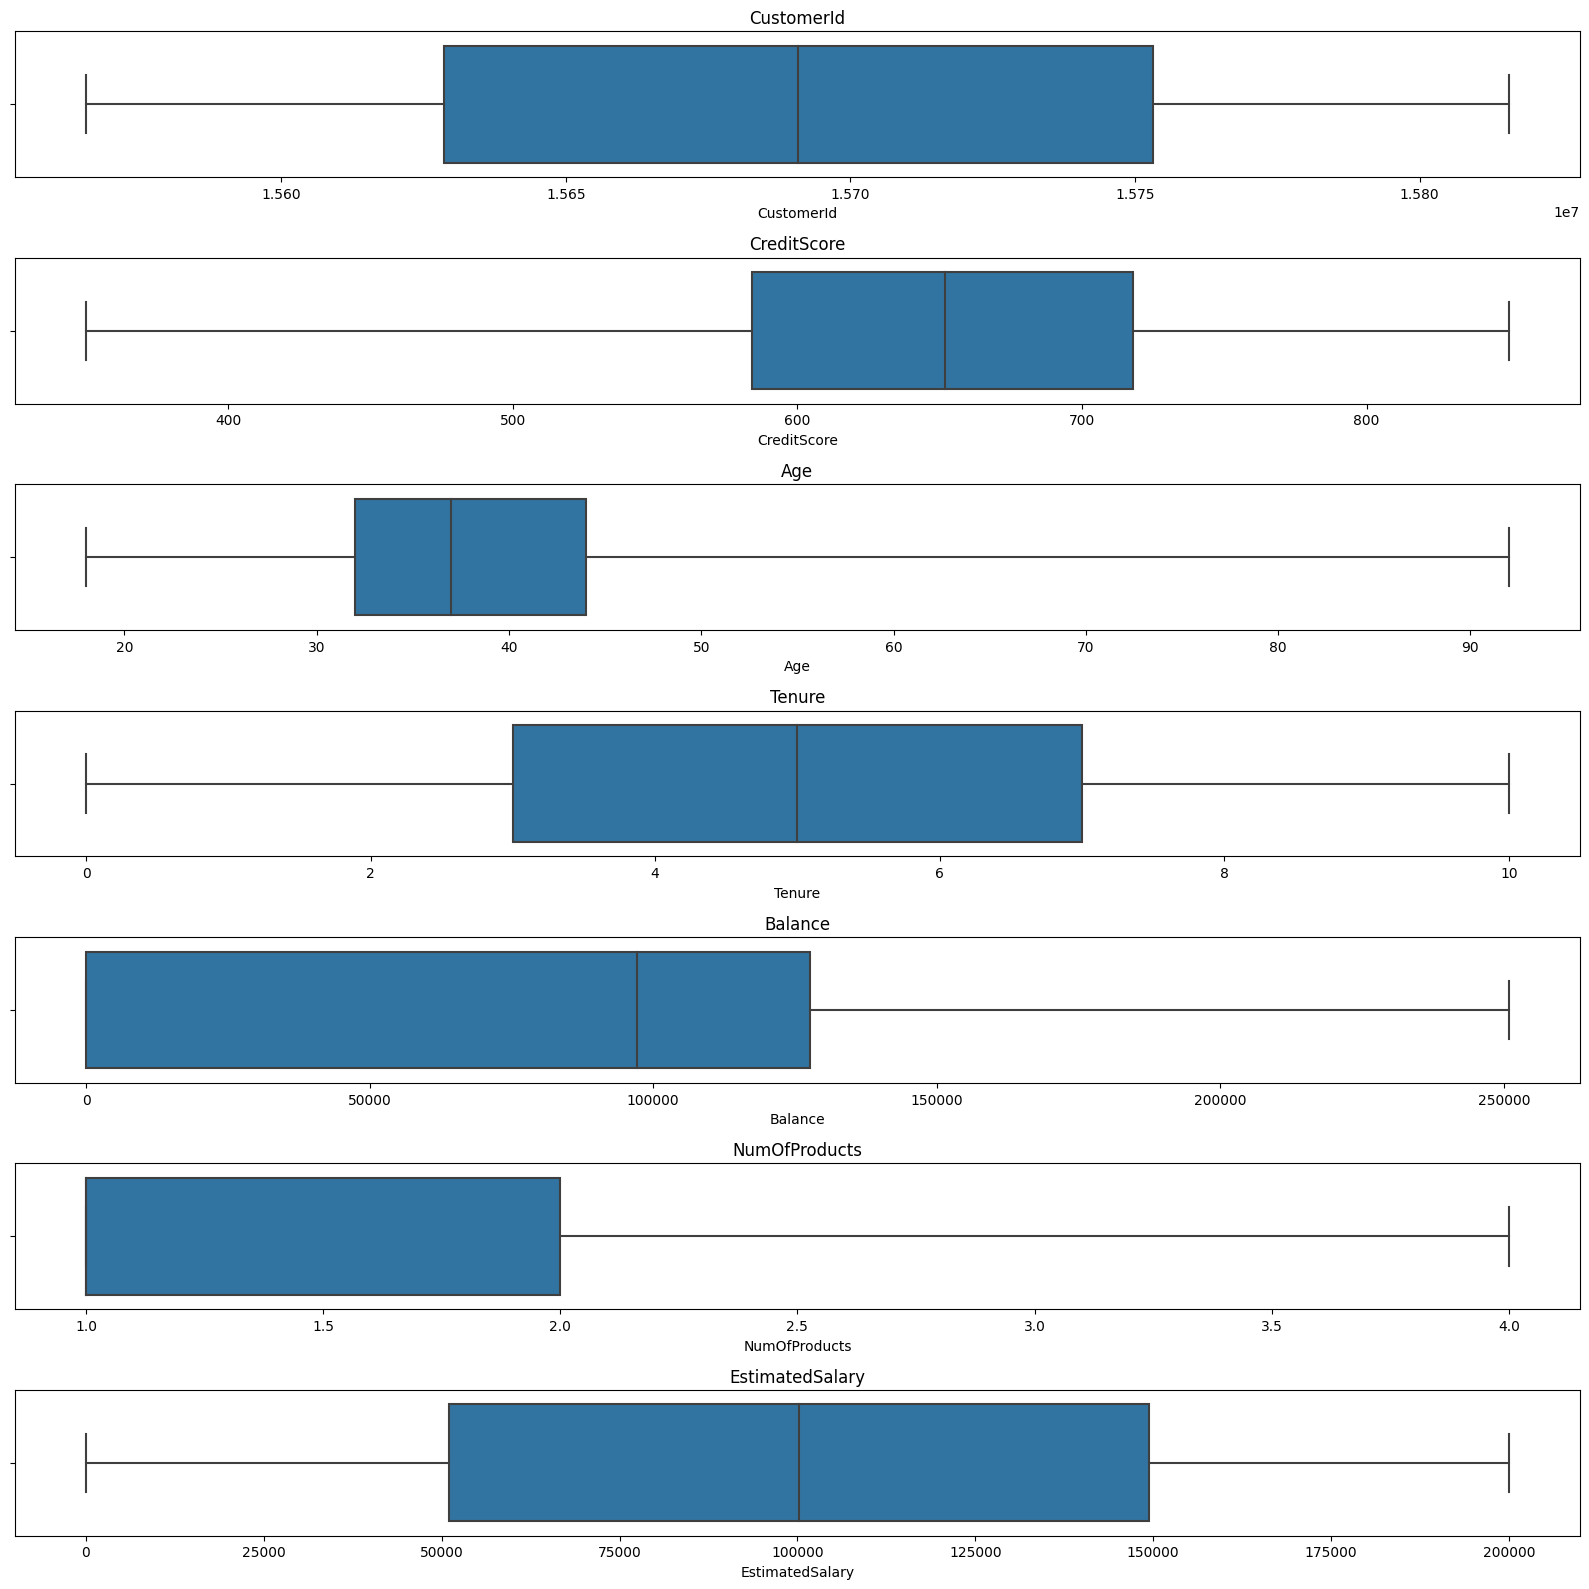

In [100]:
numeric_df = df.select_dtypes(['int','float']) # I suggest you create a list of the columns with dytpe int & float
cols = numeric_df.columns
fig, ax = plt.subplots(ncols=1 ,nrows=len(cols), figsize=(16,16))

for i, column in enumerate(cols): 
  sns.boxplot(x=df[column], ax= ax[i],data=numeric_df,whis=4)
  ax[i].set_title(column)
plt.tight_layout()
plt.show()

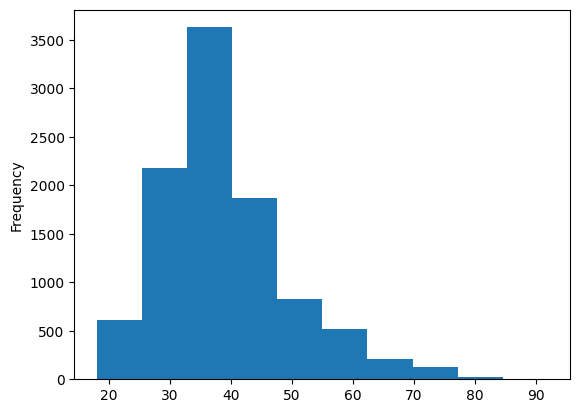

In [101]:
df.Age.plot.hist()
plt.show()

<AxesSubplot: xlabel='CreditScore', ylabel='Count'>

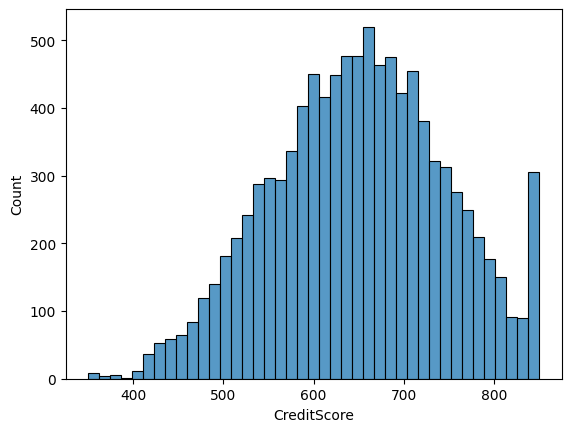

In [102]:
sns.histplot(x='CreditScore',data=df)

<AxesSubplot: xlabel='EstimatedSalary', ylabel='Density'>

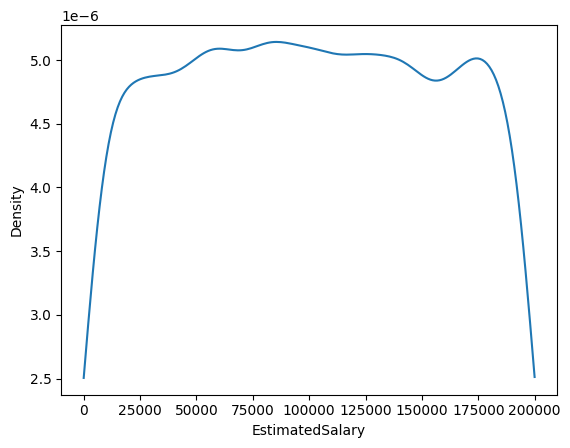

In [103]:
sns.kdeplot(x='EstimatedSalary',data=df,cut=0)

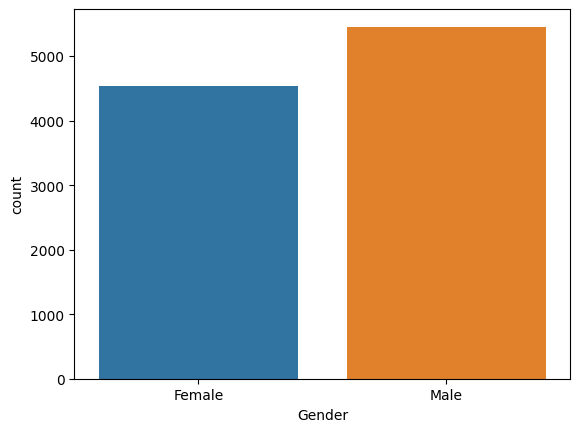

In [104]:
sns.countplot(x='Gender',data=df)
plt.show()

<AxesSubplot: xlabel='Gender', ylabel='count'>

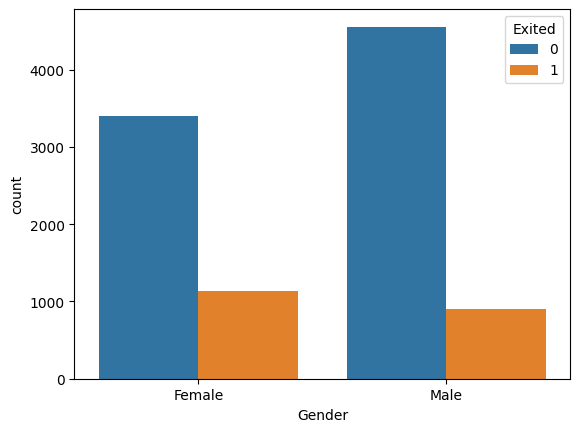

In [105]:
sns.countplot(x='Gender',data=df,hue='Exited')

<AxesSubplot: xlabel='HasCrCard', ylabel='count'>

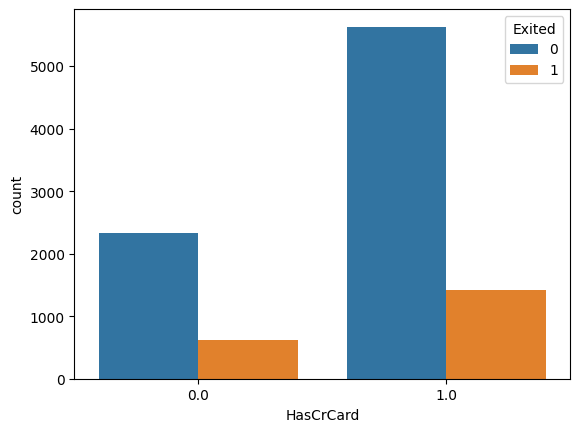

In [106]:
sns.countplot(x='HasCrCard',data=df,hue='Exited')

<AxesSubplot: xlabel='IsActiveMember', ylabel='count'>

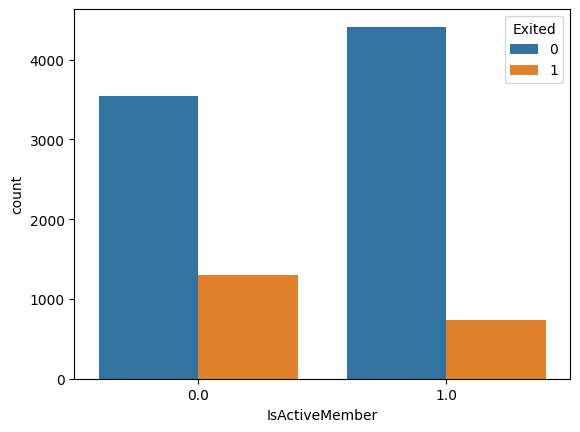

In [107]:
sns.countplot(x='IsActiveMember',data=df,hue='Exited')

<AxesSubplot: xlabel='IsActiveMember', ylabel='count'>

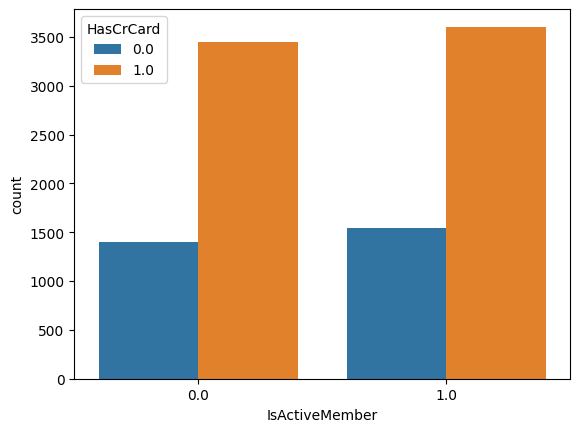

In [108]:
sns.countplot(x='IsActiveMember',data=df,hue='HasCrCard')

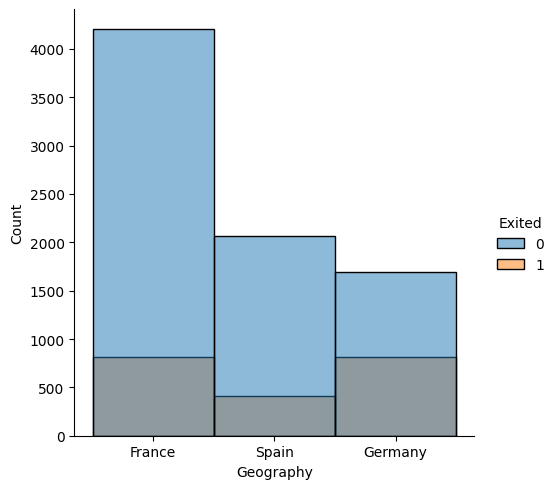

In [109]:
sns.displot(x='Geography',data=df,hue='Exited')

In [110]:
df['Expenses'] = df.EstimatedSalary - df.Balance
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Expenses
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1,101348.88
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0.0,1.0,112542.58,0,28734.72
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1,-45729.23
3,15701354,Boni,699,France,Female,39,1,0.00,2,0.0,0.0,93826.63,0,93826.63
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1.0,0.0,149756.71,1,36000.93


In [111]:
debt = df.query('Expenses < 0')
print(len(debt), 'out of', len(df),'collected loan')
debt.head()

3792 out of 9998 collected loan


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Expenses
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1,-45729.23
10,15767821,Bearce,528,France,Male,31,6,102016.72,2,0.0,0.0,80181.12,0,-21835.60
15,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0.0,1.0,64327.26,0,-78802.15
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1.0,0.0,5097.67,1,-127505.21
28,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1.0,1.0,100187.43,0,-41162.00


In [112]:
avg_geo_salary = df.groupby('Geography')['EstimatedSalary'].agg(Avg_Salary= ('mean'))
display(avg_geo_salary.sort_values(by='Avg_Salary'))
print('min:',avg_geo_salary.min())
print('max:',avg_geo_salary.max())        

,Avg_Salary
Geography,
Spain,99448.793796
France,99915.393925
Germany,101110.158243


min: Avg_Salary    99448.793796
dtype: float64
max: Avg_Salary    101110.158243
dtype: float64


In [113]:
df['Geo_Prod_Count'] = df.groupby('Geography')['NumOfProducts'].transform('sum').sort_values()

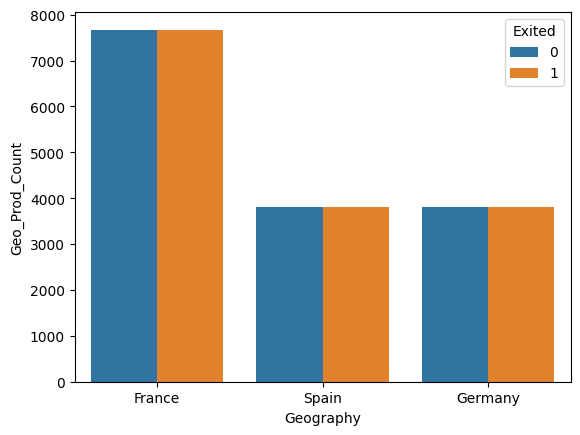

In [114]:
sns.barplot(x='Geography',y='Geo_Prod_Count',data=df,hue='Exited')
plt.show()

In [115]:
range = [0,25,60,np.max(df.Age),np.inf]
label = ['youth','adult','retiree', 'deceased']
df['Age_group'] = pd.cut(df['Age'],bins=range,labels=label)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Expenses,Geo_Prod_Count,Age_group
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1,101348.88,7672,adult
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0.0,1.0,112542.58,0,28734.72,3812,adult
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1,-45729.23,7672,adult
3,15701354,Boni,699,France,Female,39,1,0.00,2,0.0,0.0,93826.63,0,93826.63,7672,adult
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1.0,0.0,149756.71,1,36000.93,3812,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0.0,1.0,42085.58,1,42085.58,7672,adult
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1.0,0.0,92888.52,1,17813.21,3815,adult
9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1.0,0.0,92888.52,1,17813.21,3815,adult
10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1.0,0.0,38190.78,0,-91952.01,7672,adult


<AxesSubplot: xlabel='Age_group', ylabel='count'>

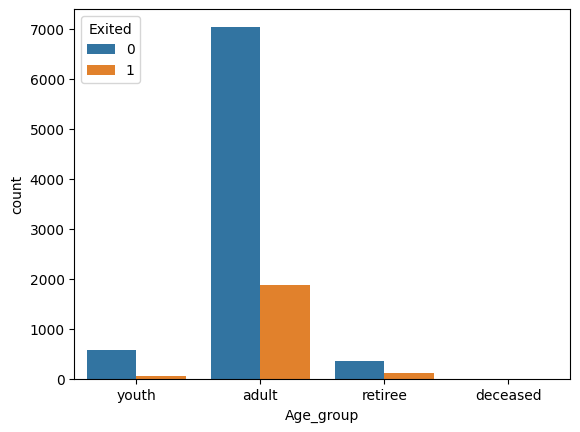

In [116]:
sns.countplot(x='Age_group',hue='Exited',data=df)

<AxesSubplot: xlabel='Age_group', ylabel='count'>

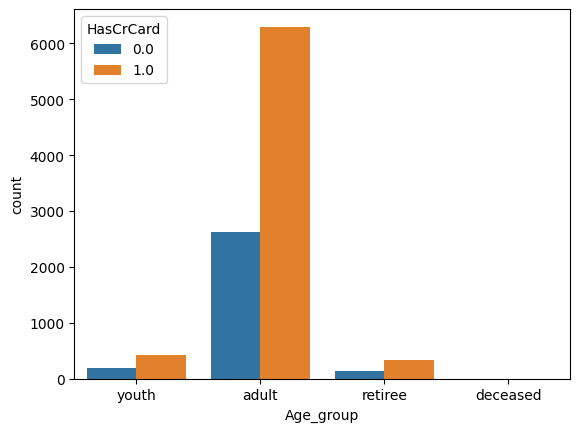

In [117]:
sns.countplot(x='Age_group',hue='HasCrCard',data=df)

<AxesSubplot: xlabel='Age_group', ylabel='count'>

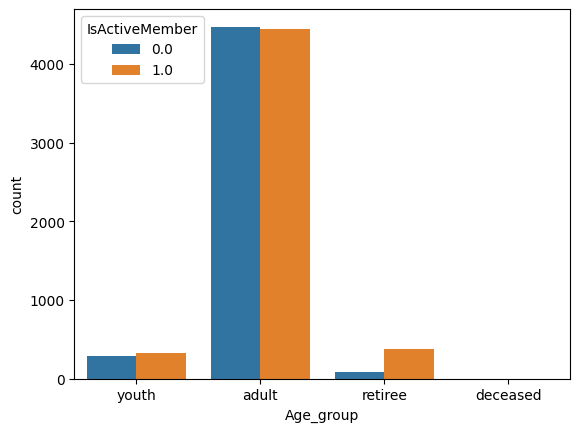

In [118]:
sns.countplot(x='Age_group',hue='IsActiveMember',data=df)

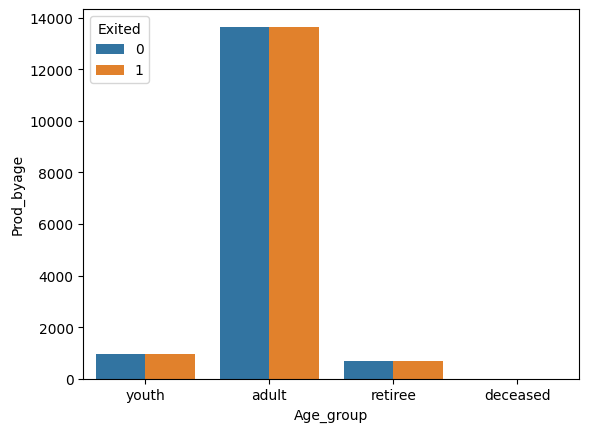

In [119]:
df['Prod_byage'] = df.groupby('Age_group')['NumOfProducts'].transform('sum')
sns.barplot(x='Age_group',y='Prod_byage',data=df,hue='Exited')
plt.show()

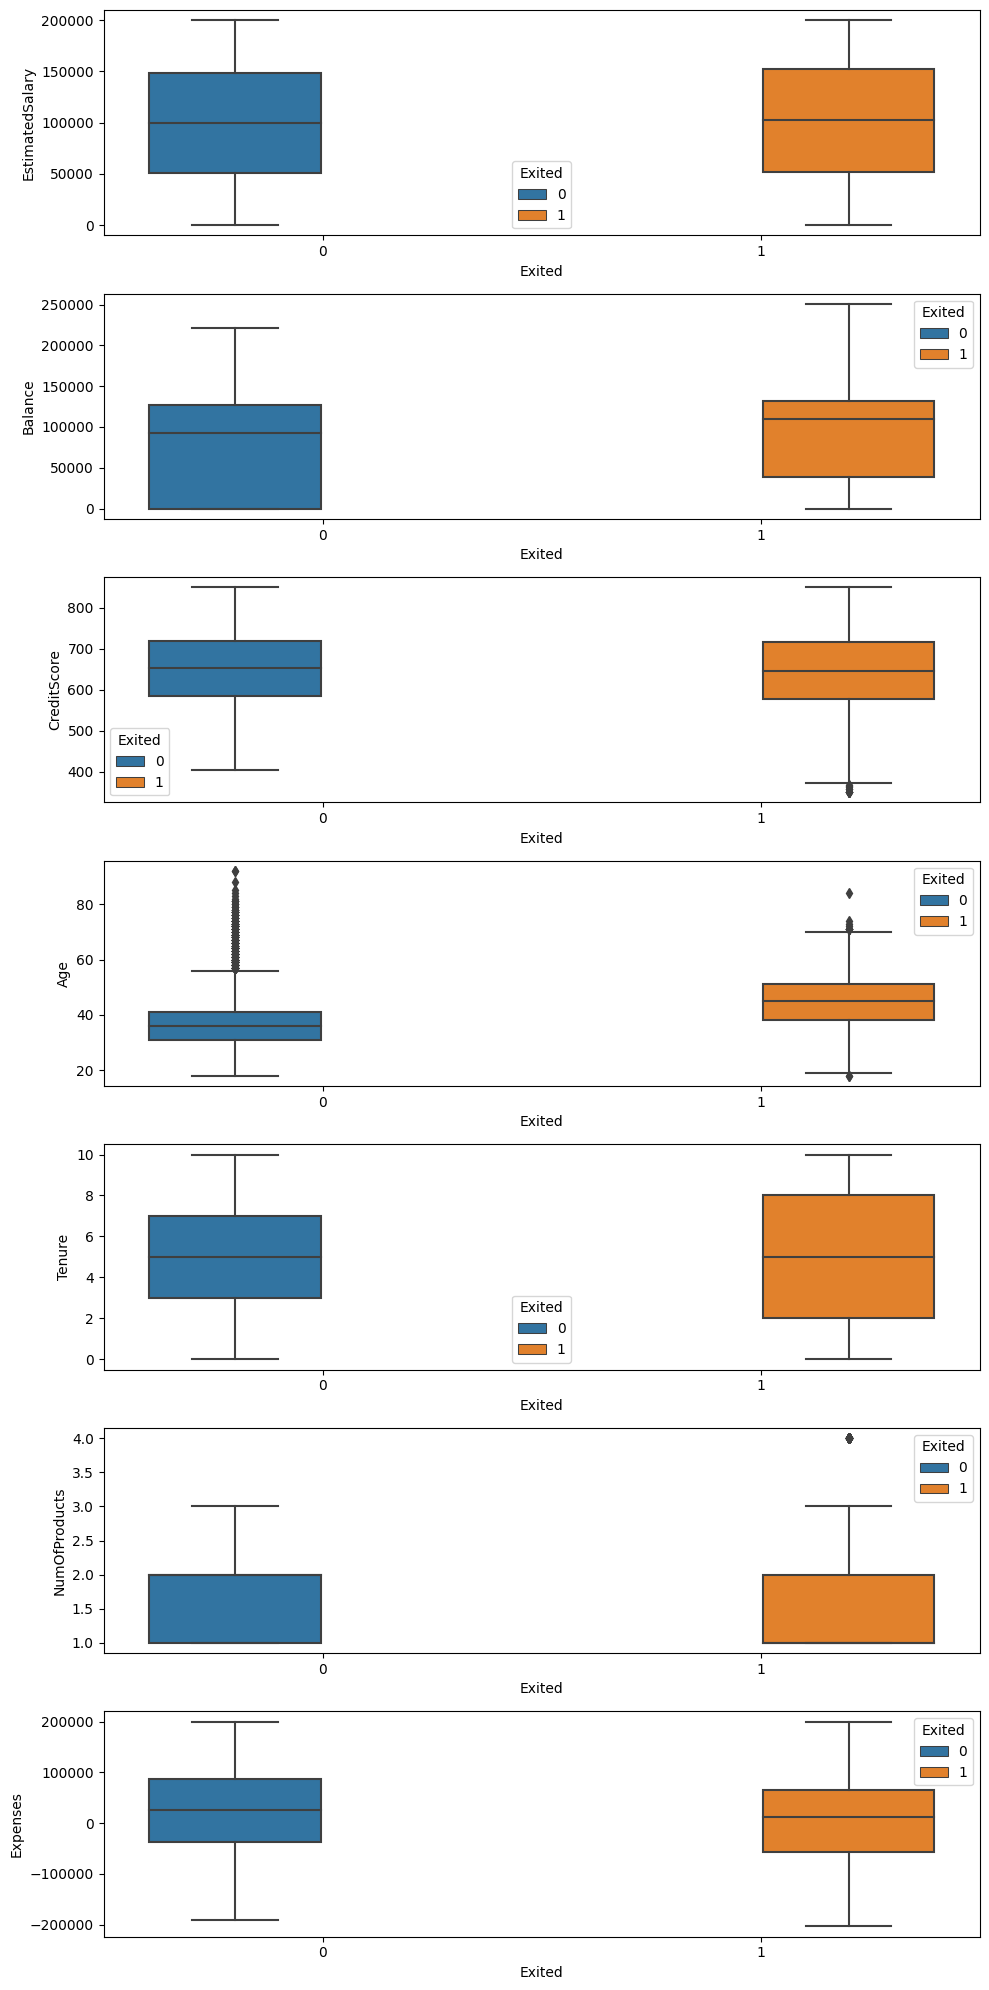

In [120]:
col= ['EstimatedSalary','Balance','CreditScore','Age','Tenure','NumOfProducts','Expenses']
fig,ax = plt.subplots(len(col),1,figsize=(10,20))
for i, col in enumerate(col):
    sns.boxplot(x='Exited',y=col,ax=ax[i],data=df,hue='Exited')
fig.tight_layout()


In [121]:
col = ['EstimatedSalary','Balance','CreditScore','Expenses','Tenure','NumOfProducts','Age']
sns.pairplot(data=df,vars=col,hue='Exited')
plt.show()

In [122]:
left = ProfileReport(df[df['Exited'] == 1], title='Exited',explorative=True)
stayed = ProfileReport(df.query('Exited == 0'),title= 'Not Exited',explorative=True)

In [123]:
compare = left.compare(stayed)
compare.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot: >

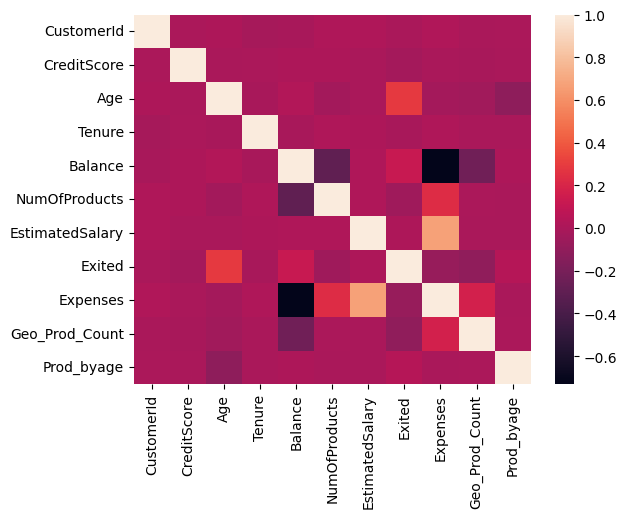

In [124]:
df.Exited = df.Exited.astype('int')
sns.heatmap(df.corr())